In [11]:
# GENERAL LIBRAIRIES IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [12]:
# DATA IMPORT
netflix = pd.read_csv('./data/Netflix.csv')
netflix.drop('Unnamed: 0', axis = 1, inplace=True)
netflix.head()

,before_90s,90s,2000s,movie,other,tv movie,video movie,Action,Documentary,Comedy,...,Thriller,Romance,Other_genre,United States,United Kingdom,France,Other_country,English,Other_language,category
0,0.0,1.0,0.0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,niche
1,0.0,1.0,0.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,other
2,0.0,0.0,1.0,1,0,0,0,0,1,1,...,0,0,1,1,0,0,0,1,1,other
3,0.0,1.0,0.0,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,1,0,other
4,1.0,0.0,0.0,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,niche


In [13]:
# SKLEARN IMPORTS
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split

In [14]:
# SYNTHESIS FUNCTION
def synthetise(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    model_name = type(model).__name__
    print(re.sub(r"(\w)([A-Z])", r"\1 \2", model_name).upper())
    print('====================')
    print('TRAIN dataset')
    print(f'Accuracy score: {accuracy_score(y_train, y_train_pred):.1%}')
    print(f'Recall score: {recall_score(y_train, y_train_pred, average="weighted"):.1%}')
    print(f'Precision score: {precision_score(y_train, y_train_pred, average="weighted"):.1%}')
    print(f'ROC_AUC score: {roc_auc_score(y_train, y_train_score, average="weighted", multi_class="ovo"):.1%}')
    print(f'Confusion matrix')
    print(confusion_matrix(y_train, y_train_pred))
    print('====================')
    print('TEST dataset')
    print(f'Accuracy score: {accuracy_score(y_test, y_test_pred):.1%}')
    print(f'Recall score: {recall_score(y_test, y_test_pred, average="weighted"):.1%}')
    print(f'Precision score: {precision_score(y_test, y_test_pred, average="weighted"):.1%}')
    print(f'ROC_AUC score: {roc_auc_score(y_test, y_test_score, average="weighted", multi_class="ovo"):.1%}')
    print(f'Confusion matrix')
    print(confusion_matrix(y_test, y_test_pred))

In [15]:
# DATA PREPARATION

X = netflix.drop('category', axis = 1)
y = netflix.category

# random_state = 42 for reproductibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until al

In [17]:
# DECISION TREE CLASSIFIER
## Naive view: default hyperparameters & all features
### Model fitting
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
### Synthesis
synthetise(dtc, X_train, X_test, y_train, y_test)

DECISION TREE CLASSIFIER
TRAIN dataset
Accuracy score: 80.8%
Recall score: 80.8%
Precision score: 80.5%
ROC_AUC score: 92.2%
Confusion matrix
[[ 367   13  315]
 [  17  810  242]
 [ 161  295 3222]]
TEST dataset
Accuracy score: 69.6%
Recall score: 69.6%
Precision score: 69.2%
ROC_AUC score: 71.4%
Confusion matrix
[[ 35   5 115]
 [  8 139  82]
 [ 87 117 773]]


In [19]:
### Conclusions
#### Good accuracy and precision, slight overfit? Let's tune hyperparameters.

In [20]:
## Hyperparameter tuning (max_depth)

### Manual trials led us to use max_depth = 3
dtc_tuned = DecisionTreeClassifier(max_depth = 3, random_state=42)
dtc_tuned.fit(X_train,y_train)
synthetise(dtc_tuned, X_train, X_test, y_train, y_test)

DECISION TREE CLASSIFIER
TRAIN dataset
Accuracy score: 73.4%
Recall score: 73.4%
Precision score: 69.1%
ROC_AUC score: 70.6%
Confusion matrix
[[   6   23  666]
 [   2  627  440]
 [   6  313 3359]]
TEST dataset
Accuracy score: 74.9%
Recall score: 74.9%
Precision score: 66.1%
ROC_AUC score: 68.6%
Confusion matrix
[[  0   4 151]
 [  1 131  97]
 [  1  87 889]]


In [ ]:
### No more overfit!
### Accuracy remains good at almost 75%.
### Model does not have a lot of noise so we can use it.

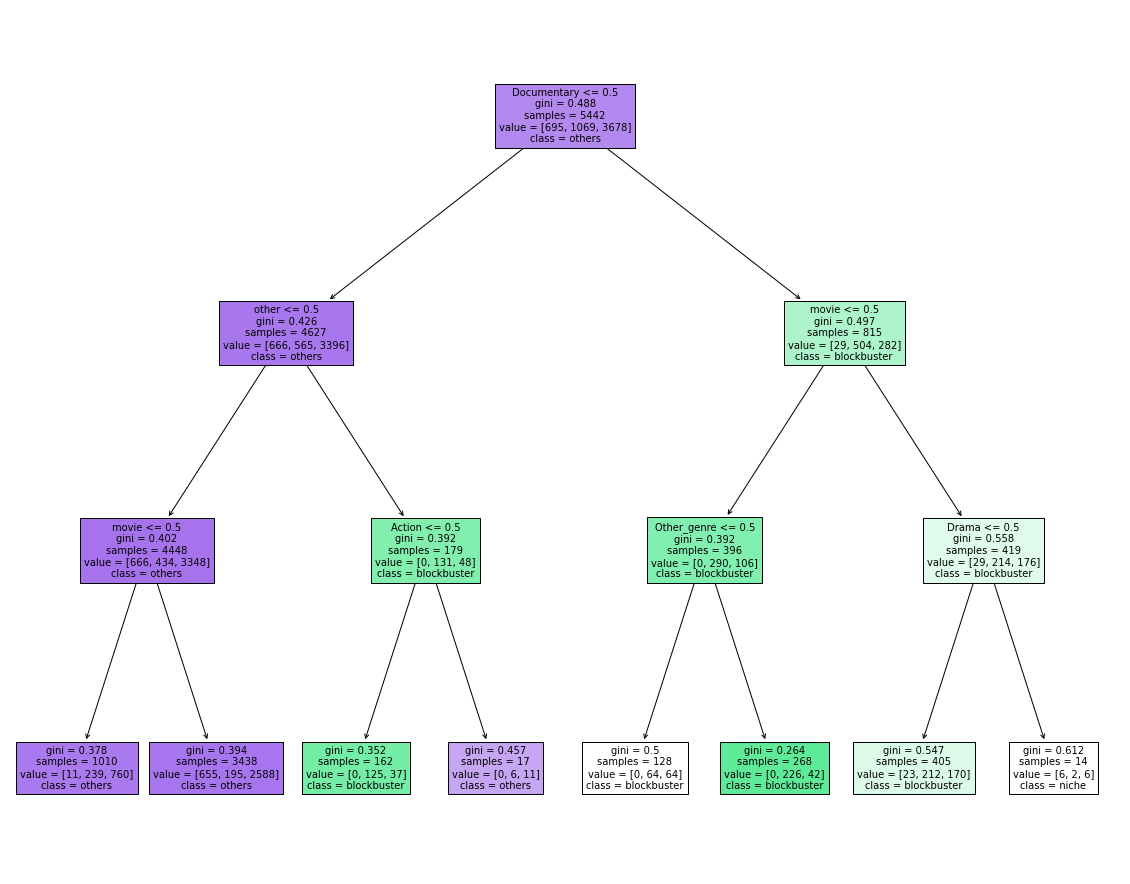

In [22]:
plt.figure(figsize = (20,16))
fn = X_train.columns
cn = ['niche', 'blockbuster', 'others']
plot_tree(dtc_tuned,feature_names = fn, class_names = cn, filled = True);